In [2]:
pip install pandas
pip install numpy

     |████████████████████████████████| 10.0 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 32.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [57]:
import pandas as pd
import numpy as np

In [4]:
DataFrame = pd.read_csv('car data.csv')

In [6]:
DataFrame.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
DataFrame.shape #301 rows and 9 features/col.

(301, 9)

In [8]:
#Check category features and try to print unique values
print(DataFrame['Seller_Type'].unique())
print(DataFrame['Transmission'].unique())
print(DataFrame['Owner'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [9]:
#check missing values or null values in dataset
DataFrame.isnull().sum() #all values are present and null value is not present

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
#For descriptive statistics
DataFrame.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [11]:
DataFrame.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [12]:
#Whenever we have features Year, 
#we try to create new our own derive feature number of years to find how old car 
#is to check the depricition

MasterDataFrame = DataFrame[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]



In [13]:
#Check all features are there or not
MasterDataFrame

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [17]:
#Create new feature and asign value 2020
MasterDataFrame['Current_Year'] = 2020

In [18]:
MasterDataFrame['Number_Years'] = MasterDataFrame['Current_Year'] - MasterDataFrame['Year']


In [20]:
#Now we drop year and current year feature from dataset
#Inpace = true to make changes permanent
MasterDataFrame.drop(['Year'],axis = 1, inplace=True)
MasterDataFrame.drop(['Current_Year'],axis = 1, inplace=True)

In [22]:
MasterDataFrame

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,4
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,5
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,11
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,3


In [25]:
#Convert categorical features into dummies as machine learning use only numerical values
#Drop the categorical column and keep only dummies
#drop_first=True
#Dummy variable track --> means when there are 2 features zero it means 3rd feature is valid

MasterDataFrame = pd.get_dummies(MasterDataFrame, drop_first=True)



In [26]:
MasterDataFrame.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [27]:
#Find out correlation
#to check how one feature correlated to another feature

MasterDataFrame.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Number_Years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [29]:
#pip install seaborn

     |████████████████████████████████| 215 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 12.5 MB 14.0 MB/s eta 0:00:01     |███████████████████████████████ | 12.0 MB 14.0 MB/s eta 0:00:01
     |████████████████████████████████| 28.7 MB 7.0 MB/s eta 0:00:011
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
     |████████████████████████████████| 60 kB 1.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [35]:
#To check in graphical view
import seaborn as sns


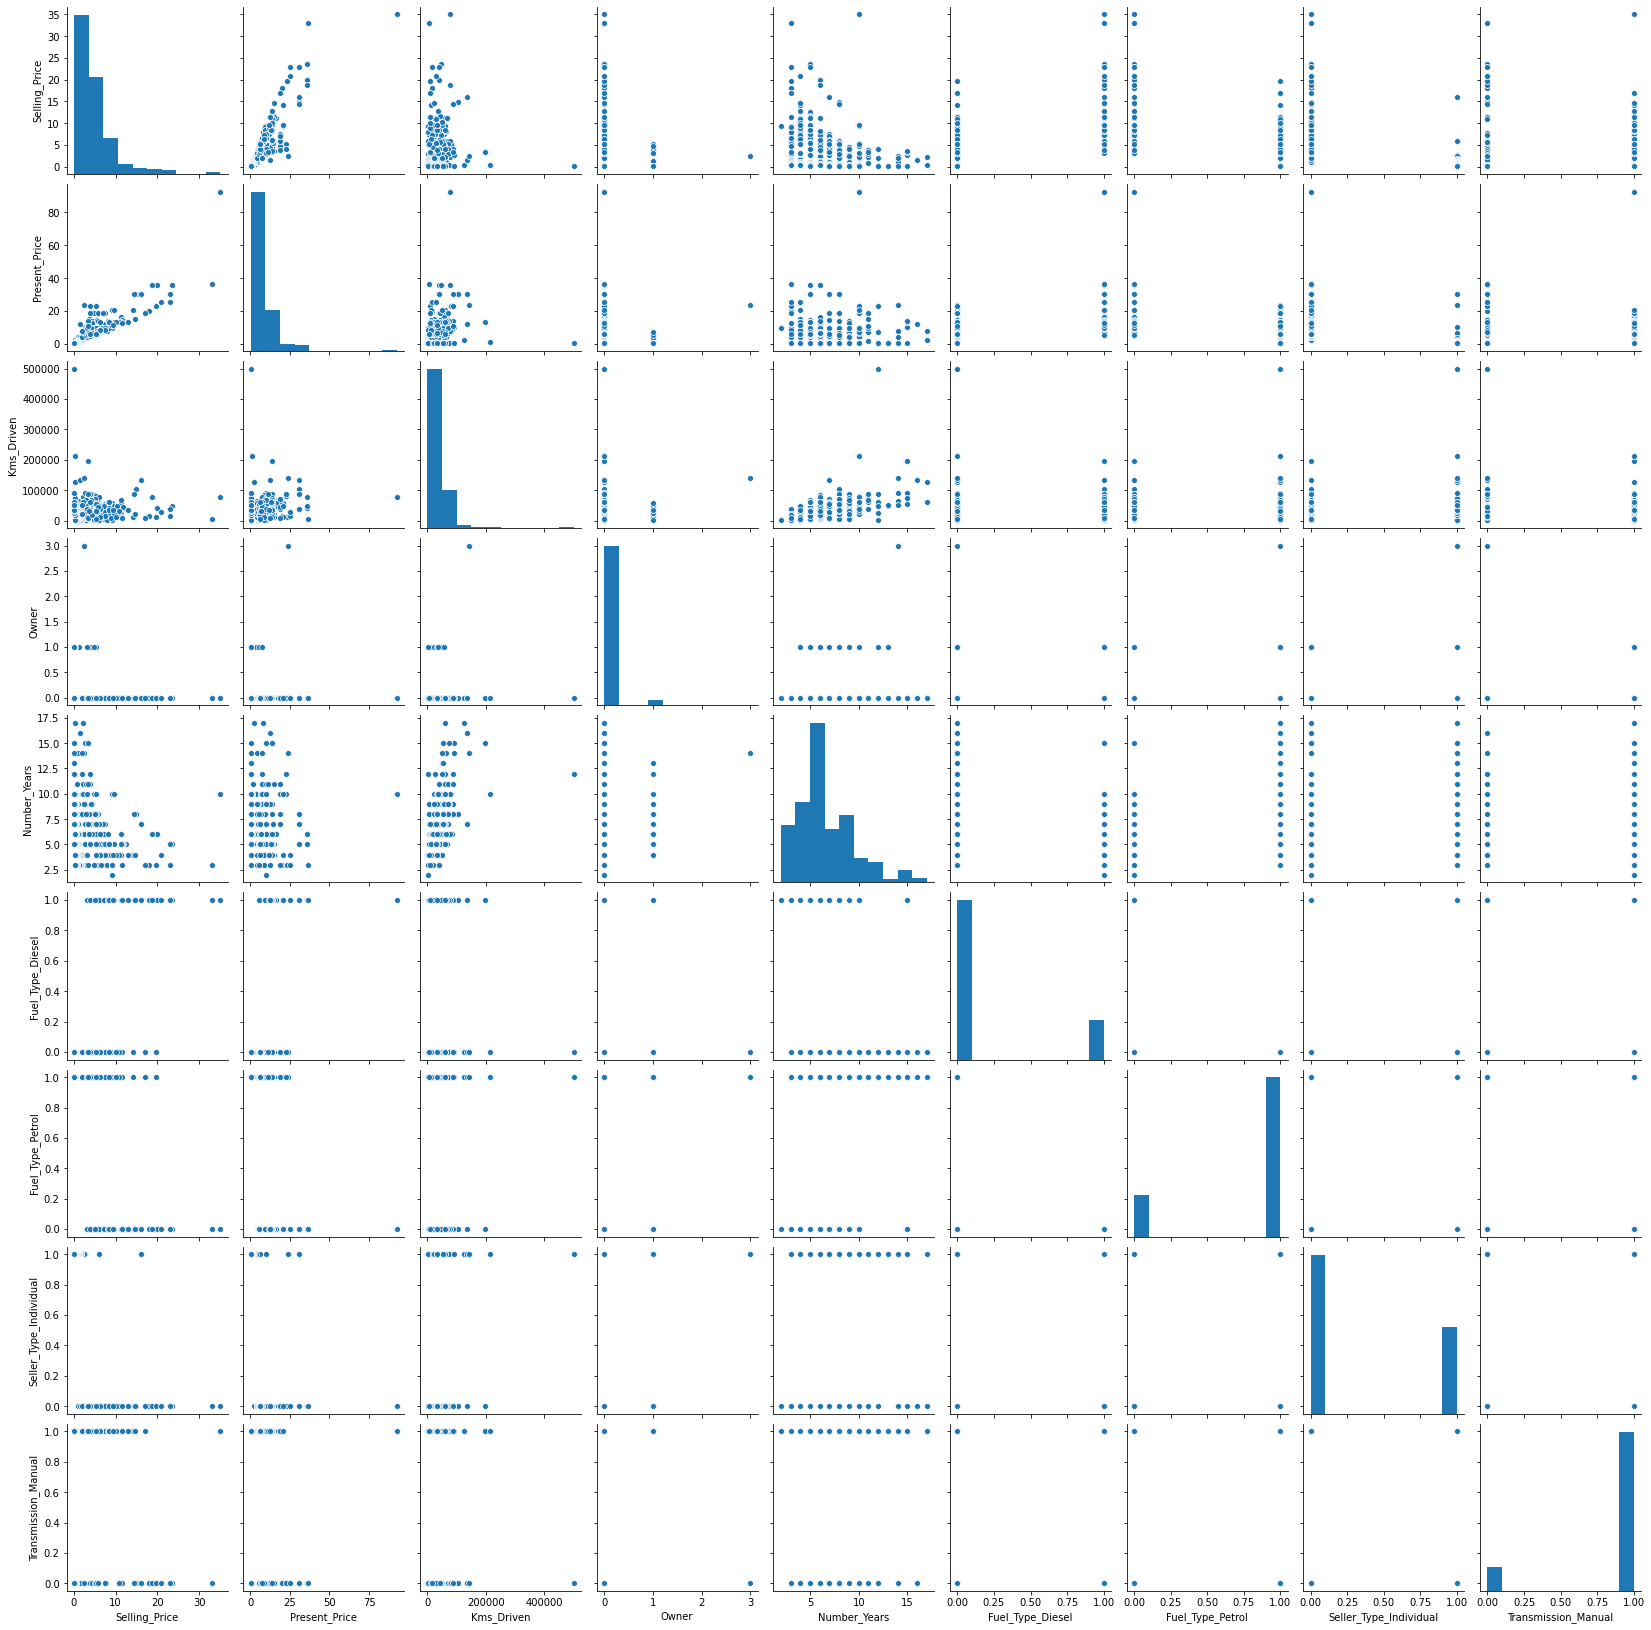

In [32]:
sns.pairplot(MasterDataFrame)

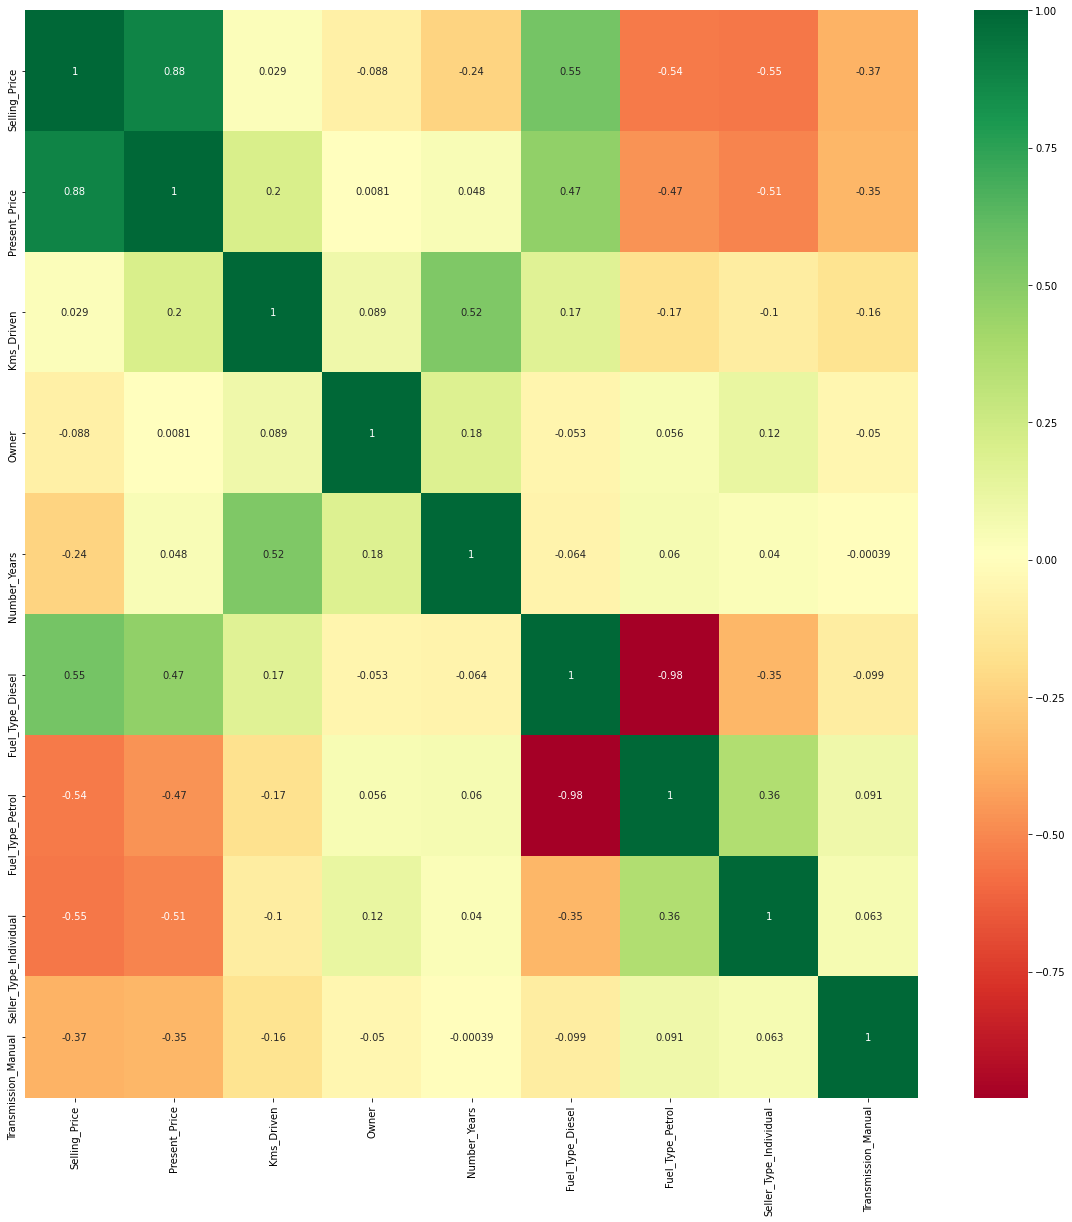

In [37]:
#again use seaborn to see corelation in form of heatmap
import matplotlib.pyplot as plt
%matplotlib inline

corrmat = MasterDataFrame.corr()
Top_Corr_Features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
#annot to get lables
#cmap = for colour
plt = sns.heatmap(MasterDataFrame[Top_Corr_Features].corr(),annot=True,cmap="RdYlGn")






In [39]:
#Independent and dependent features
X = MasterDataFrame.iloc[:,1:] #Except first col. all other are in X independent
y = MasterDataFrame.iloc[:,0] #First col as dependent vairable


In [40]:
X.head()

,Present_Price,Kms_Driven,Owner,Number_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [42]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [44]:
pip install sklearn

Processing /Users/ganesh_dhasade/Library/Caches/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e/sklearn-0.0-py2.py3-none-any.whl
  Using cached scikit_learn-0.23.1-cp37-cp37m-macosx_10_9_x86_64.whl (7.2 MB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
     |████████████████████████████████| 300 kB 1.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [47]:
#Feature importance
from sklearn.ensemble import ExtraTreesRegressor #As this is regression problem
model = ExtraTreesRegressor()
model.fit(X,y)





ExtraTreesRegressor()

In [48]:
#To get the value of each col. importance
print(model.feature_importances_)

[0.38081195 0.039813   0.00076659 0.07790768 0.23231006 0.00724988
 0.12769398 0.13344687]


AttributeError: 'AxesSubplot' object has no attribute 'show'

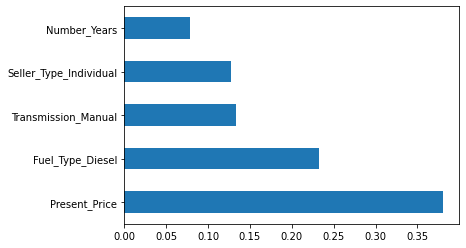

In [51]:
#check graphically importance
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(5).plot(kind='barh') #Top 5 largest feature 
plt.show()

In [54]:
#Split the dataset

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2)



In [55]:
X_train.shape

(240, 8)

In [59]:
#Hypeparameters
#Basically selecting different different decision tree value from 100 to 1200
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num=12)]
print(n_estimators)
#this are the decision trees we have selected for our hyper parameters


[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [65]:
#Randomized search CV
#All values are randomly selected
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num=12)]

#Number of features to consider at every split
max_features = ['auto','sqrt']

#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30, num = 6)]

#Minimum numbers of samples required to split a node
min_samples_split = [2,3,10,15,100]

#Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]






In [61]:
#We are using randomize search cv
from sklearn.model_selection import RandomizedSearchCV




In [66]:
random_grid = {'n_estimators':n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 3, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [69]:
#intialize random forest regressor
#first create the base model to tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [70]:
#All above declare parameters it select the best features parameters
rf_random = RandomizedSearchCV (estimator = rf, 
                          param_distributions = random_grid,
                         scoring ='neg_mean_squared_error',
                         n_iter = 10,
                         cv = 5, #cross validation
                         verbose = 2, #Displaying results
                         random_state = 42,
                        n_jobs = 1 #how many cores we have to use of laptop
                         )

In [71]:
#Training the model
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=3, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=3, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=3, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=3, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=3, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=3, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=3, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=3, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=900, min_samples_split=3, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=3, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.3s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   44.3s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 3, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [72]:
#prediction
predictions = rf_random.predict(X_test)


In [73]:
predictions

array([ 1.30132,  0.63199,  5.63142,  1.0893 ,  9.65778,  5.27525,
        8.56285,  8.54677,  1.11533,  2.53861,  0.52223,  4.86612,
        2.53245,  0.53554,  8.78536,  4.32545,  0.82208,  0.5774 ,
        4.84455,  6.65629, 15.94135,  7.51312,  7.99887,  0.44719,
        1.12131,  0.38593,  3.53786,  9.18137,  2.60493,  1.15498,
        0.56525, 14.02914,  4.87064,  5.01707,  0.84392, 11.32458,
        0.65944,  4.65105,  5.93185,  6.77302,  1.40583,  5.2271 ,
        6.19402,  0.48534,  2.59773, 10.29684,  5.9036 ,  0.35151,
        2.14836,  5.02366,  0.2139 ,  0.43674, 11.37529,  0.5253 ,
        8.71364,  2.81175,  5.6844 ,  0.56018,  0.5115 ,  7.49672,
        3.27612])

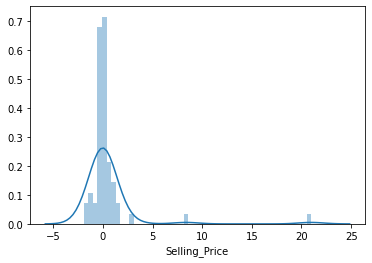

In [80]:
#Graphically comapre predictions 
sns.distplot(y_test-predictions)

In [81]:
#Plot the predictions
plt.scatter(y_test,predictions)


In [84]:
#Now model is created now need to pickle the file
import pickle
#Open a file, where you want to store the data

file =  open('random_forest_regression_model.pkl','wb')#Write byte mode

#dump information to that file

pickle.dump(rf_random,file)
#pickle file is serialized file for deployment


In [85]:
pip install flask

     |████████████████████████████████| 94 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 298 kB 11.4 MB/s eta 0:00:01
     |████████████████████████████████| 82 kB 5.3 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [86]:
pip install jsonify

Processing /Users/ganesh_dhasade/Library/Caches/pip/wheels/a7/15/e0/a5eb19cf0496a9ea2bddb0c9f1dc324559385806b75400988b/jsonify-0.5-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [87]:
pip install request

  Created wheel for request: filename=request-0.0.0-py3-none-any.whl size=1325 sha256=b42a92297a5903cd7165c6c3bb516bd46838f1a594fc8f316ed6a1877f1e7eff
  Stored in directory: /Users/ganesh_dhasade/Library/Caches/pip/wheels/52/10/b7/1e5bd8592e77c628031614a83d4fd2c504ae374ce1ef83aa54
  Created wheel for get: filename=get-0.0.0-py3-none-any.whl size=1323 sha256=5c923ce2ea825362d134dd6267ff0e7a95d4df9fd0b9d7081c6dcf2ac3902448
  Stored in directory: /Users/ganesh_dhasade/Library/Caches/pip/wheels/2b/ec/a6/09cf4d5eb292441077169a2a4922e09967d6ef266e9cd8a359
  Created wheel for post: filename=post-0.0.0-py3-none-any.whl size=1258 sha256=1f309d9614fdec2666bc69423b09b5a1cfbe5d737597bd8216ec70224bc201ad
  Stored in directory: /Users/ganesh_dhasade/Library/Caches/pip/wheels/03/d9/0f/8aa37d75c2ea361d5bbe68d1b24f5211f4a998d5777bca0899
  Created wheel for query-string: filename=query_string-0.0.0-py3-none-any.whl size=1508 sha256=d98c9e12a3210cf15a7ad1758deb98fd320f34fda6e25a0c170c6283cd2d130a
  Store